Cargo librerias

In [631]:
# Tratamiento de datos y gráficos
import pandas as pd  # Manejo de datasets tipo tabla
import numpy as np  # Manejo de arreglos

# Visualizacion de datos
import seaborn as sns  # Gráficos estadísticos
import matplotlib.pyplot as plt  # Gráficos
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot')  # Estilo de gráficos
plt.rcParams["figure.figsize"] = (6, 6)  # Tamaño de gráfico

# Configuracion general
import warnings
warnings.filterwarnings('ignore')  # Oculta warnings

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler  # Escalado de datos
from sklearn.preprocessing import scale  # Escalado alternativo
from sklearn.preprocessing import LabelEncoder  #Transfoma variables actegóricas en números

# Construccion de pipelines
from sklearn.pipeline import make_pipeline

# Modelado y evaluación
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.model_selection import RepeatedStratifiedKFold  # Validación cruzada estratificada repetida
from sklearn.model_selection import cross_val_score  # Evaluación con validación cruzada
from sklearn.model_selection import cross_validate
from sklearn import datasets  # Datasets de ejemplo

# Modelos de clasificación
from sklearn.naive_bayes import GaussianNB  # Clasificador bayesiano ingenuo
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis  # QDA

# Reducción de dimensionalidad
from sklearn.decomposition import PCA  # Componentes principales

# Métricas y visualización de resultados
from sklearn.metrics import confusion_matrix, accuracy_score  # Métricas básicas
from sklearn.metrics import ConfusionMatrixDisplay  # Visualización de matriz de confusión

# matriz de confusión: https://es.wikipedia.org/wiki/Matriz_de_confusi%C3%B3n


In [632]:
# Cargar dataset Iris (desde tu archivo CSV)
datos = pd.read_csv(r"D:\2025\2025 SEGUNDO CUATRIMESTRE\Inferencia Estadistica y reconocimiento de patrones\PCA\Tarea\Iris.csv")

datos = datos.drop(columns=["Id"])  # saco la columna Id 

X = datos.drop("Species", axis=1).values
y = LabelEncoder().fit_transform(datos["Species"])

labels = datos.columns[:-1].tolist()
clases_nombres = np.unique(datos["Species"])

print(datos.columns.tolist())

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [633]:
# Preprocesamiento básico
# Converti la variable objetivo a numérica
datos["Species_num"] = datos["Species"].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})

# Elijo variables predictoras (X) y la variable de clasificación (y)
X = datos[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]].values
y = datos["Species_num"].values

# Escalo los datos
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

print("Shape de X:", X_scaled.shape) # 150 filas (observaciones → flores) 4 columnas (variables predictoras → largo y ancho de sépalo y pétalo).
print("Shape de y:", y.shape) # Representa la clase a la que pertenece cada flor (0, 1 o 2). y tiene 150 valores → uno por cada flor.
print("Primeras filas de X:\n", X_scaled[:5]) # valores originales de las 4 variables, pero transformados con StandardScaler
print("Primeros valores de y:\n", y[:5]) # Las primeras 5 flores son de la clase 0 = "Iris-setosa".

Shape de X: (150, 4)
Shape de y: (150,)
Primeras filas de X:
 [[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
Primeros valores de y:
 [0 0 0 0 0]


# Clasificador Bayesiano Ingenuo

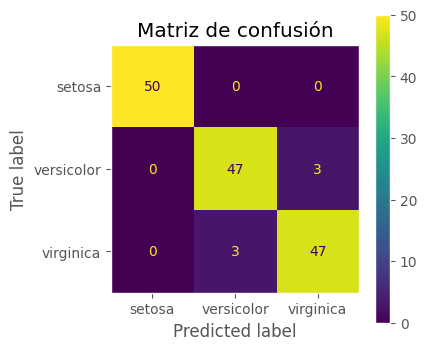

In [634]:
gnb = GaussianNB()
modelo_gnb = gnb.fit(X, y)
y_pred = modelo_gnb.predict(X)

# Matriz de confusión
conf = confusion_matrix(y, y_pred)

etiquetas = ['setosa', 'versicolor', 'virginica']

# Gráfico matriz de confusión
fig, ax = plt.subplots(figsize=(4, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=conf, display_labels=etiquetas)

disp.plot(values_format='d', cmap="viridis", ax=ax, colorbar=True)

# Ocultar las líneas blancas de la grilla
plt.gca().images[-1].set_interpolation('nearest')  
plt.gca().set_xticks(np.arange(len(etiquetas)))
plt.gca().set_yticks(np.arange(len(etiquetas)))
plt.grid(False)

plt.title("Matriz de confusión")
plt.show()

- Cada fila representa la clase real (etiqueta verdadera).
- Cada columna representa la clase predicha por el modelo.
- Los números indican cuántas muestras fueron clasificadas en cada combinación.
- La diagonal principal (de arriba a la izquierda a abajo a la derecha) muestra los aciertos:
- 50 Iris-setosa fueron correctamente clasificadas.
- 47 Iris-versicolor correctamente clasificadas, 3 fueron clasificadas como Iris-virginica.
- 47 Iris-virginica correctamente clasificadas, 3 fueron clasificadas como Iris-versicolor.
- Los valores fuera de la diagonal son errores de clasificación.
- El modelo clasifica perfectamente a Iris-setosa y tiene muy pocos errores entre Iris-versicolor y Iris-virginica. El clasificador tiene un desempeño muy bueno en este caso.

# Análisis de discriminante lineal
https://www.statology.org/linear-discriminant-analysis-in-python/

In [635]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
lda_iris = LinearDiscriminantAnalysis()
lda_iris.fit(X, y)


print("Número de observaciones:", len(datos.index))

Número de observaciones: 150


In [636]:
X_iris = datos.drop("Species", axis=1).values
y_iris = LabelEncoder().fit_transform(datos["Species"])
clases_nombres = np.unique(datos["Species"])

lda_iris = LinearDiscriminantAnalysis()
lda_iris.fit(X, y)

X = datos.drop("Species", axis=1).values
y = LabelEncoder().fit_transform(datos["Species"])

In [637]:
# Ajuste el modelo LDA
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [638]:
# Definir el método de validación cruzada
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluar el modelo usando accuracy
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

# Mostrar resultados
print(f"Precisión promedio: {np.mean(scores):.4f}")
print(f"El modelo LDA clasifica correctamente las flores en el {np.mean(scores)*100:.2f}% de los casos")

Precisión promedio: 0.9800
El modelo LDA clasifica correctamente las flores en el 98.00% de los casos


In [639]:
# Definir nueva observación
new = [5.1, 3.5, 1.4, 0.2]

# Predecir a qué clase pertenece la nueva observación
pred = lda_iris.predict([new])[0]
print("Predicción:", pred)
print("Especie predicha:", clases_nombres[pred])

Predicción: 0
Especie predicha: Iris-setosa


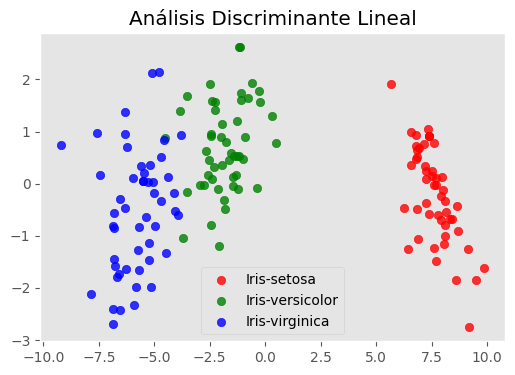

In [640]:
# Definir X e y
X = datos.drop("Species", axis=1).values
y = LabelEncoder().fit_transform(datos["Species"])  # clases: 0, 1, 2

# Instanciar y ajustar el modelo LDA para 2 dimensiones
model = LinearDiscriminantAnalysis(n_components=2)
data_plot = model.fit(X, y).transform(X)

# Nombres de las clases (según orden codificado)
target_names = np.unique(datos["Species"])

# Crear gráfico LDA
plt.figure(figsize=(6,4))
colors = ['red', 'green', 'blue']
lw = 2

# Gráfico de dispersión
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1],
                alpha=.8, color=color, label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title("Análisis Discriminante Lineal")
plt.grid()

# Mostrar gráfico
plt.show()

- Cada punto representa una flor.
- Setosa está separada, sus características son muy distintas de las otras dos especies.
- Versicolor y Virginica están más cerca entre sí, sus medidas son más similares y pueden superpone un poco.
- El modelo LDA logró encontrar un plano donde las clases se distinguen claramente, lo que sugiere que es muy efectivo para clasificar este dataset.

# # Análisis Discriminante Cuadrático
https://www.statology.org/quadratic-discriminant-analysis-in-python/

In [641]:
print(datos.head(10).to_string(index=False))

 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm     Species  Species_num
           5.1           3.5            1.4           0.2 Iris-setosa            0
           4.9           3.0            1.4           0.2 Iris-setosa            0
           4.7           3.2            1.3           0.2 Iris-setosa            0
           4.6           3.1            1.5           0.2 Iris-setosa            0
           5.0           3.6            1.4           0.2 Iris-setosa            0
           5.4           3.9            1.7           0.4 Iris-setosa            0
           4.6           3.4            1.4           0.3 Iris-setosa            0
           5.0           3.4            1.5           0.2 Iris-setosa            0
           4.4           2.9            1.4           0.2 Iris-setosa            0
           4.9           3.1            1.5           0.1 Iris-setosa            0


In [642]:
# Definir variables predictoras y de respuesta
X = datos.drop("Species", axis=1).values
y = LabelEncoder().fit_transform(datos["Species"])

# Ajuste el modelo QDA
model = QuadraticDiscriminantAnalysis()
model.fit(X, y)

QuadraticDiscriminantAnalysis()

In [643]:
# Definir método para evaluar el modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Definir método para evaluar el modelo
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluar modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))
print(f"El modelo QDA logra clasificar correctamente los vinos en el {np.mean(scores)*100:.2f}% de los casos")

0.3333333333333334
El modelo QDA logra clasificar correctamente los vinos en el 33.33% de los casos


# PCA

In [644]:
# Definir variables predictoras (X) y variable objetivo (y)
X = datos.drop(columns=["Species", "Species_num"])
y = datos["Species"]

# Mostrar primeras 5 filas
print(X.head().to_string(index=False))

 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
           5.1           3.5            1.4           0.2
           4.9           3.0            1.4           0.2
           4.7           3.2            1.3           0.2
           4.6           3.1            1.5           0.2
           5.0           3.6            1.4           0.2


In [645]:
# Matriz de correlación
# Calculaste la matriz de correlación para entender la relación entre las variables numéricas.
matriz_correlacion = X.corr()
print(matriz_correlacion.to_string(index=False))

 SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
      1.000000     -0.109369       0.871754      0.817954
     -0.109369      1.000000      -0.420516     -0.356544
      0.871754     -0.420516       1.000000      0.962757
      0.817954     -0.356544       0.962757      1.000000


In [646]:
# Calculo la media de cada variable
# La media es el promedio de todos los valores de una variable. Se calcula sumando todos los valores y dividiendo por la cantidad total de valores.
print('----------------------')
print('Media de cada variable')
print('----------------------')
print(datos.mean(numeric_only=True, axis=0)) # Species es texto (Iris-setosa, etc.), asi que pido que solo tome columnas numéricas

----------------------
Media de cada variable
----------------------
SepalLengthCm    5.843333
SepalWidthCm     3.054000
PetalLengthCm    3.758667
PetalWidthCm     1.198667
Species_num      1.000000
dtype: float64


In [647]:
# Calculo la varianza de cada variable
# La varianza mide la dispersión de los datos con respecto a la media.
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
print(datos.var(numeric_only=True, axis=0))

-------------------------
Varianza de cada variable
-------------------------
SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species_num      0.671141
dtype: float64


In [648]:
# Entrenamiento modelo PCA con escalado de los datos
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(X)   # usar solo las variables numéricas

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [649]:
# Se convierte el array a dataframe para añadir nombres a los ejes
componentes = pd.DataFrame(
    data    = modelo_pca.components_,
    columns = X.columns,
    index   = [f'PC{i}' for i in range(1, modelo_pca.n_components_ + 1)]
)

print(componentes)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
PC1       0.522372     -0.263355       0.581254      0.565611
PC2       0.372318      0.925556       0.021095      0.065416
PC3       0.721017     -0.242033      -0.140892     -0.633801
PC4      -0.261996      0.124135       0.801154     -0.523546


La tabla muestra las "cargas" o "pesos" de cada variable original (por ejemplo, SepalLengthCm, SepalWidthCm, etc.) en cada componente principal (PC1, PC2, PC3, PC4).

- Cada fila representa un componente principal (PC).
- Cada columna representa una variable original.
- Los valores indican cuánto contribuye cada variable original a ese componente principal.
- Un valor alto (positivo o negativo) indica que esa variable tiene mucho peso en ese componente.


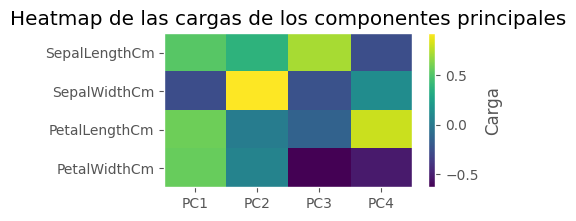

In [650]:
# Heatmap componentes

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
plt.imshow(modelo_pca.components_.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(modelo_pca.n_components_), [f'PC{i+1}' for i in range(modelo_pca.n_components_)])
plt.grid(False)
plt.colorbar(label='Carga')
plt.title('Heatmap de las cargas de los componentes principales')
plt.show()

- Filas: Variables originales.
- Columnas: Componentes principales (PC1, PC2, PC3, PC4).
- Colores: El valor de la “carga” o “peso” de cada variable en cada componente principal.
- Un valor alto (más amarillo) indica que esa variable contribuye mucho a ese componente.
- Un valor bajo o negativo (más azul/morado) indica poca o contribución opuesta.

- Si una variable tiene un color intenso (positivo o negativo) en una columna (PC), significa que esa variable es importante para ese componente
--------------------------------------------------------------------------------------------------------

PC1, PC2, PC3 y PC4 son nuevas variables que resumen la información de las variables originales, ordenadas según cuánta varianza explican en el conjunto de datos.

--------------------------------------------------------------------------------------------------------

[0.72770452 0.23030523 0.03683832 0.00515193]


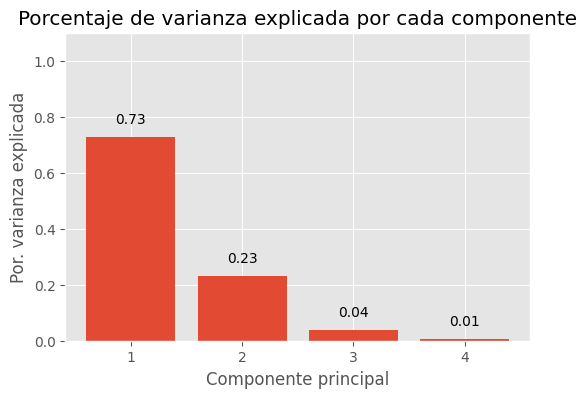

In [651]:
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()

- Eje X: Los componentes principales (PC1, PC2, PC3, PC4).
- Eje Y: El porcentaje de la varianza total de los datos que explica cada componente.

- PC1 explica la mayor parte de la varianza (en este caso, 0.73 o 73%).
- PC2 explica el siguiente mayor porcentaje (0.23 o 23%).
- PC3 y PC4 explican porcentajes mucho menores (4% y 1%).

La mayor parte de la información (varianza) de los datos originales se puede resumir usando solo los dos primeros componentes principales (PC1 y PC2). 

[0.72770452 0.95800975 0.99484807 1.        ]


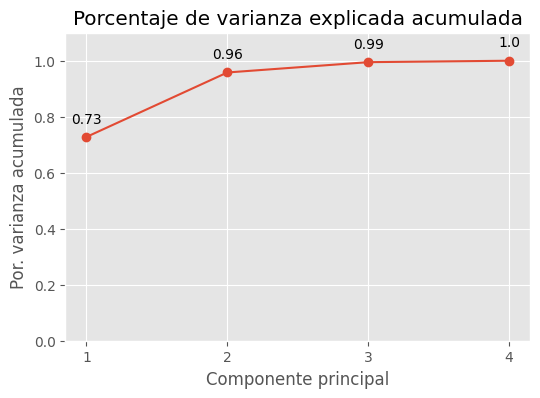

In [652]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()

print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1,
    prop_varianza_acum,
    marker='o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada')
plt.show()

- Usando solo PC1, se explica el 73% de la varianza de los datos.
- Con PC1 y PC2 juntos, se explica el 96%.
- Con PC1, PC2 y PC3, se llega al 99%.
- Con los cuatro componentes, se explica el 100% (toda la varianza original).
- Esto indica que casi toda la información de los datos originales se puede resumir usando solo los dos primeros componentes principales. 

Muestra el porcentaje total de la varianza de los datos que se explica al ir sumando componentes principales uno a uno. 

In [653]:
# Proyecciones de las observaciones de entrenamiento
proyecciones = pca_pipe.transform(X)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1' ,'PC2' ,'PC3', 'PC4'],
    index=datos.index
)
proyecciones.head()

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,0.121943,-0.023073
1,-2.086426,-0.655405,0.227251,-0.103208
2,-2.367950,-0.318477,-0.051480,-0.027825
3,-2.304197,-0.575368,-0.098860,0.066311
4,-2.388777,0.674767,-0.021428,0.037397


- PC1, PC2, PC3, PC4 son los primeros cuatro componentes principales.
- Cada uno representa una combinación lineal de las variables originales.
- PC1 tiene la mayor varianza, PC2 la segunda mayor.

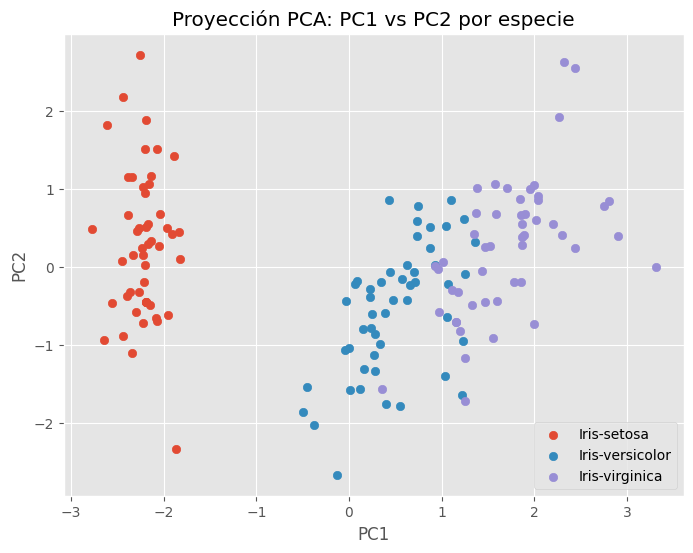

In [654]:
# Gráfico de dispersión PC1 vs PC2 coloreado por especie
plt.figure(figsize=(8, 6))
for especie in datos['Species'].unique():
    idx = datos['Species'] == especie
    plt.scatter(
        proyecciones.loc[idx, 'PC1'],
        proyecciones.loc[idx, 'PC2'],
        label=especie
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Proyección PCA: PC1 vs PC2 por especie')
plt.legend()
plt.grid(True)
plt.show()

- Cada punto es una flor del dataset.
- El eje X es el valor de PC1 (el componente que más varianza explica).
- El eje Y es el valor de PC2 (el segundo componente más importante).

- El gráfico permite ver cómo se separan las especies en el nuevo espacio de menor dimensión (solo 2 ejes en vez de 4).
- Si los grupos de colores están bien separados, significa que las especies son distinguibles usando solo PC1 y PC2.
- Iris-setosa está separada, Iris-versicolor y Iris-virginica se superponen un poco, pero también muestran cierta separación.

In [655]:
# Escalar los datos numéricos (X) y calcular la proyección manualmente
X_escalado = scale(X)
proyecciones_manual = np.dot(modelo_pca.components_, X_escalado.T)
proyecciones_manual = pd.DataFrame(
    proyecciones_manual,
    index=['PC1', 'PC2', 'PC3', 'PC4']
).transpose().set_index(datos.index)
proyecciones_manual.head()

,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,0.121943,-0.023073
1,-2.086426,-0.655405,0.227251,-0.103208
2,-2.367950,-0.318477,-0.051480,-0.027825
3,-2.304197,-0.575368,-0.098860,0.066311
4,-2.388777,0.674767,-0.021428,0.037397


In [656]:
# Calcular la matriz de correlación
correlaciones = proyecciones.corr()

# Mostrar la matriz
print(correlaciones)

              PC1           PC2           PC3           PC4
PC1  1.000000e+00 -6.281259e-17  6.780829e-17  1.739170e-15
PC2 -6.281259e-17  1.000000e+00 -1.454691e-15 -1.799983e-16
PC3  6.780829e-17 -1.454691e-15  1.000000e+00  4.078137e-15
PC4  1.739170e-15 -1.799983e-16  4.078137e-15  1.000000e+00


- Los valores en la diagonal son 1, cada componente está perfectamente correlacionado consigo mismo.
- Los valores fuera de la diagonal son 0 
- Los componentes principales son ortogonales e independientes entre sí.
- No hay correlación entre PC1, PC2, PC3 y PC4.
- El PCA genera componentes principales que no están correlacionados entre sí.

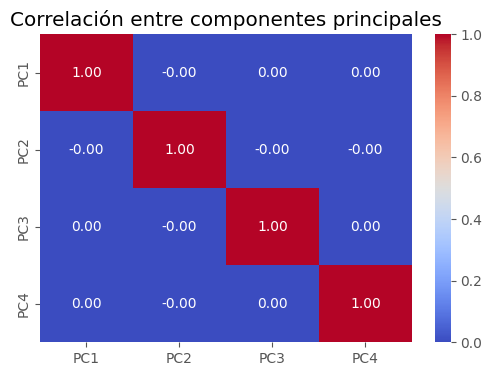

In [657]:
plt.figure(figsize=(6, 4))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre componentes principales')
plt.show()

- Diagonal: Todos los valores son 1, cada componente está perfectamente correlacionado consigo mismo.
- Fuera de la diagonal: Todos los valores son 0, no hay correlación entre los diferentes componentes principales.
- Los componentes principales son ortogonales e independientes entre sí.

In [658]:
# Reconstrucción de las observaciones originales desde las proyecciones PCA
recostruccion = pca_pipe.inverse_transform(proyecciones)
recostruccion = pd.DataFrame(
    recostruccion,
    columns=X.columns,
    index=datos.index
)

print('------------------')
print('Valores originales')
print('------------------')
display(X.head())

print('---------------------')
print('Valores reconstruidos')
print('---------------------')
display(recostruccion.head())

------------------
Valores originales
------------------


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


---------------------
Valores reconstruidos
---------------------


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


- Los valores reconstruidos son muy similares a los originales, significa que la mayor parte de la información de los datos originales se conserva al usar los componentes principales.
- Esto demuestra que el PCA puede reducir la dimensionalidad (usar menos variables) sin perder casi información.

In [659]:
X = datos[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
y = datos["Species_num"]  


pca = PCA(n_components=2)   # por ejemplo 2 componentes
X_pca = pca.fit_transform(X)

# Definimos métricas
scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Lista de algoritmos
modelos = {
    "Naive Bayes": GaussianNB(),
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(),
}

# Evaluamos cada modelo
resultados = {}
for nombre, modelo in modelos.items():
    scores = cross_validate(modelo, X_pca, y, cv=5, scoring=scoring)
    resultados[nombre] = {
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision_macro'].mean(),
        "Recall": scores['test_recall_macro'].mean(),
        "F1": scores['test_f1_macro'].mean()
    }

import pandas as pd
df_resultados = pd.DataFrame(resultados).T
print(df_resultados)

             Accuracy  Precision    Recall        F1
Naive Bayes  0.900000   0.904781  0.900000  0.899647
LDA          0.960000   0.961077  0.960000  0.959933
QDA          0.973333   0.974545  0.973333  0.973300


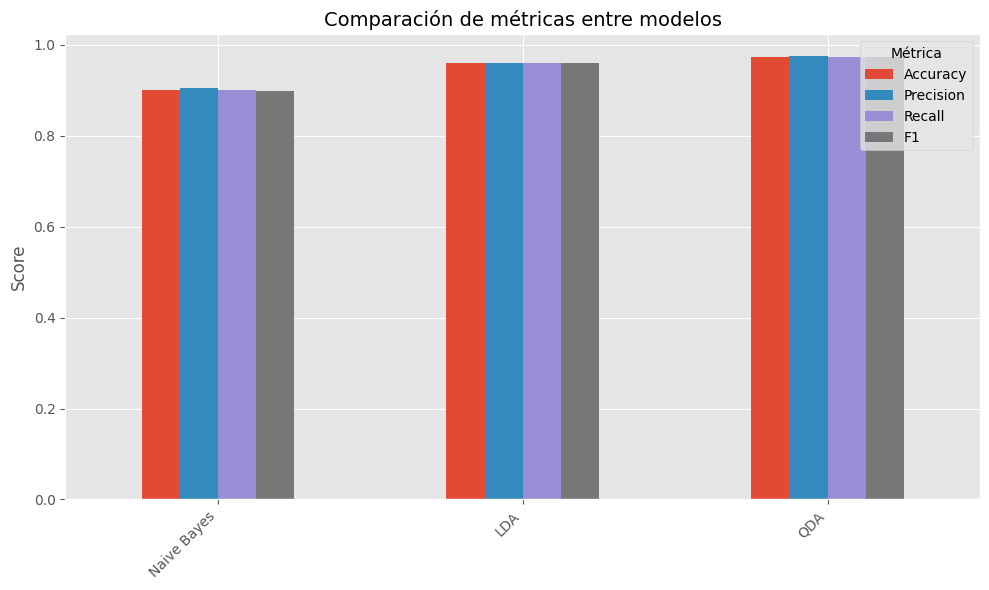

In [660]:
# Gráfico de barras comparativo
df_resultados.plot(kind="bar", figsize=(10,6))
plt.title("Comparación de métricas entre modelos", fontsize=14)
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Métrica")
plt.tight_layout()
plt.show()
